# Histogram equalization
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/YoniChechik/AI_is_Math/blob/master/c_02a_basic_image_processing/histogram_equalization.ipynb)



In [3]:
# # to run in google colab
# import sys
# if 'google.colab' in sys.modules:
#     import subprocess
#     subprocess.call('apt-get install subversion'.split())
#     subprocess.call('svn export https://github.com/YoniChechik/AI_is_Math/trunk/c_02a_basic_image_processing/Unequalized_Hawkes_Bay_NZ.jpg'.split())



In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

figsize = (10,10)


First, read the image as grayscale



Text(0.5, 1.0, 'Original image')

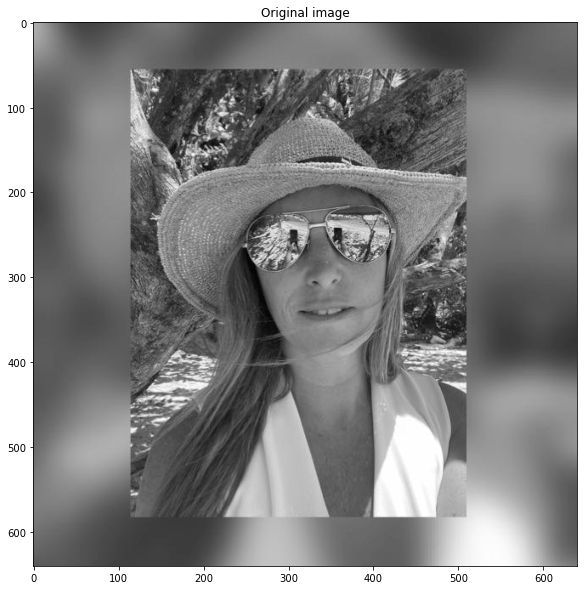

In [5]:
# read as grayscale
# I = cv2.imread("Unequalized_Hawkes_Bay_NZ.jpg",0)
I = cv2.imread("dana1.jpg",0)

plt.figure(figsize=figsize)
plt.imshow(I, cmap='gray', vmin=0, vmax=255)
plt.title("Original image")


Let's start by calculating and showing the original histogram


In [6]:
bins_edges_min_max = [0,256]
num_bins=256
bin_count,bins_edges = np.histogram(I,num_bins,bins_edges_min_max)
bins_start = bins_edges[:-1]


Text(0.5, 1.0, 'Original histogram')

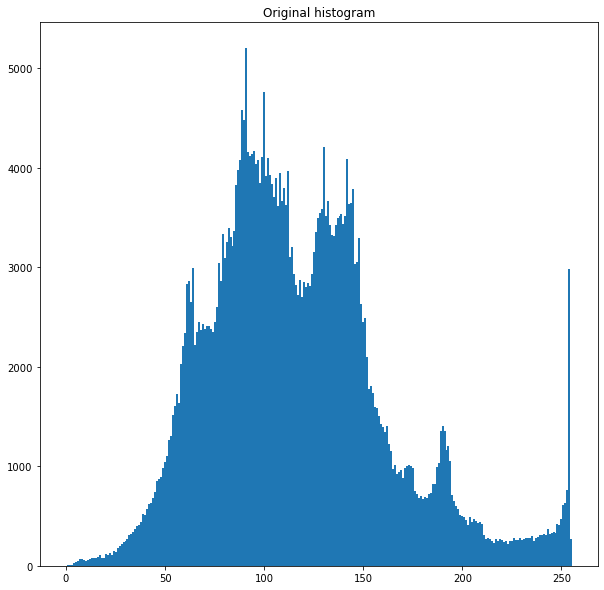

In [7]:
def draw_hist(x_axis,input):
    fig,ax = plt.subplots(figsize=figsize)
    # why not using plt.hist? because we want to plot also some derivations of this hist, so this is easier
    plt.bar(x_axis, input, width=input.shape[0]/(x_axis[-1]-x_axis[0]+1))
    return fig,ax

draw_hist(bins_start,bin_count)
plt.title("Original histogram")



Normalize the histogram to gat a discrete PDF


Text(0.5, 1.0, 'Original PDF')

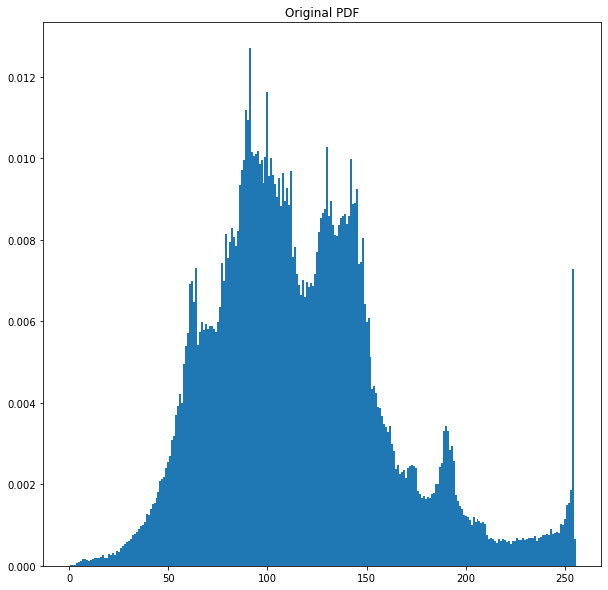

In [8]:
pdf = bin_count/np.sum(bin_count)

draw_hist(bins_start,pdf)
plt.title("Original PDF")



Get the CDF by calculating the cumulative sum of the pdf data


Text(0.5, 1.0, 'Original CDF')

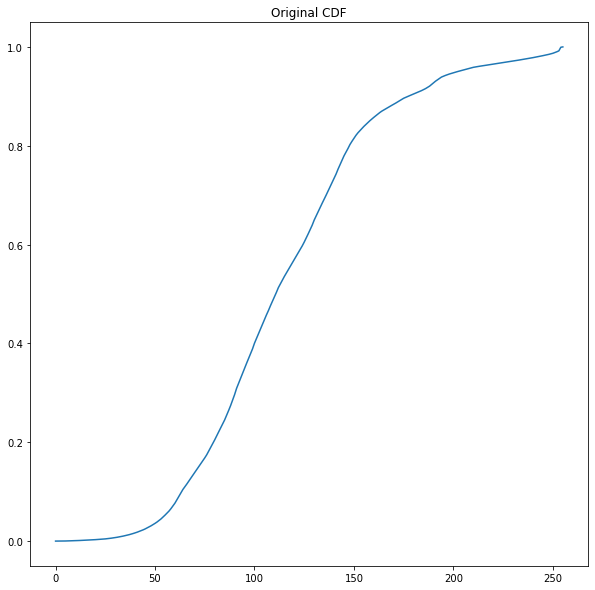

In [9]:
cdf = np.cumsum(pdf)

plt.figure(figsize=figsize)
plt.plot(cdf)
plt.title("Original CDF")



Text(0.5, 1.0, 'Original PDF+ const*CDF to show the connection between the two')

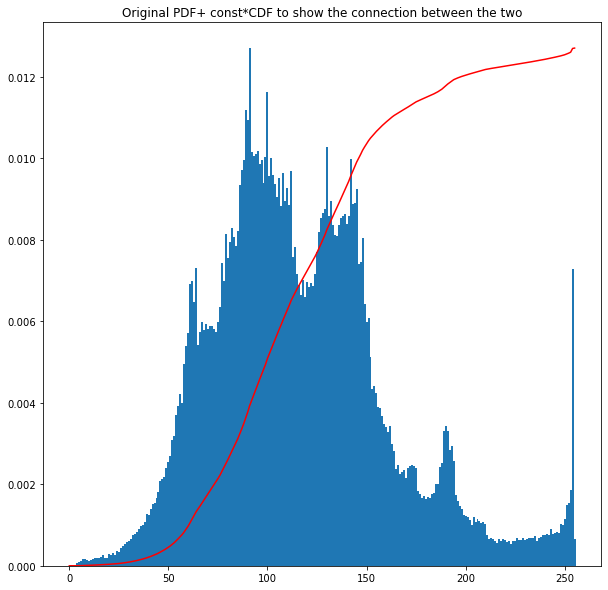

In [10]:
fig,ax = draw_hist(bins_start,pdf)
ax.plot(cdf*np.max(pdf),'r')
plt.title("Original PDF+ const*CDF to show the connection between the two")



The final step is to un-normalize the CDF to become the equalization function


In [11]:
f_eq = np.round(cdf*255).astype(int)

f_eq


array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   2,   2,   2,   2,   2,   2,   3,   3,   3,   3,   4,
         4,   4,   5,   5,   5,   6,   6,   7,   7,   8,   8,   9,  10,
        11,  11,  12,  13,  14,  15,  17,  18,  20,  21,  23,  25,  27,
        28,  29,  31,  32,  34,  35,  37,  38,  40,  41,  43,  45,  46,
        48,  50,  52,  54,  56,  58,  60,  63,  65,  67,  70,  73,  76,
        79,  81,  84,  87,  89,  92,  94,  97,  99, 102, 105, 107, 110,
       112, 114, 117, 119, 121, 124, 126, 128, 131, 133, 135, 137, 138,
       140, 142, 143, 145, 147, 149, 150, 152, 154, 156, 159, 161, 163,
       166, 168, 170, 172, 174, 176, 178, 181, 183, 185, 187, 189, 192,
       194, 196, 199, 201, 203, 205, 206, 208, 209, 211, 212, 213, 214,
       215, 216, 217, 218, 219, 220, 220, 221, 222, 222, 223, 224, 224,
       225, 225, 226, 227, 227, 228, 229, 229, 229, 230, 230, 23

Use the equalization function to get the equalized image


Text(0.5, 1.0, 'equalized image')

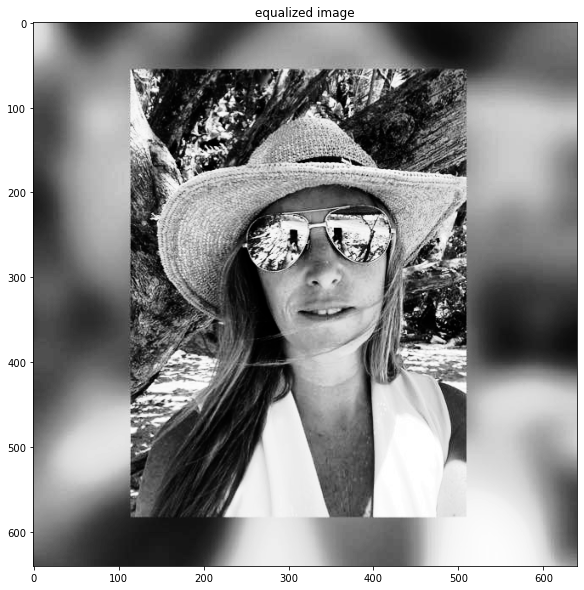

In [12]:
I_eq = f_eq[I]

plt.figure(figsize=figsize)
plt.imshow(I_eq, cmap='gray', vmin=0, vmax=255)
plt.title("equalized image")


Plot the equalized histogram, PDF and CDF


Text(0.5, 1.0, 'equalized histogram')

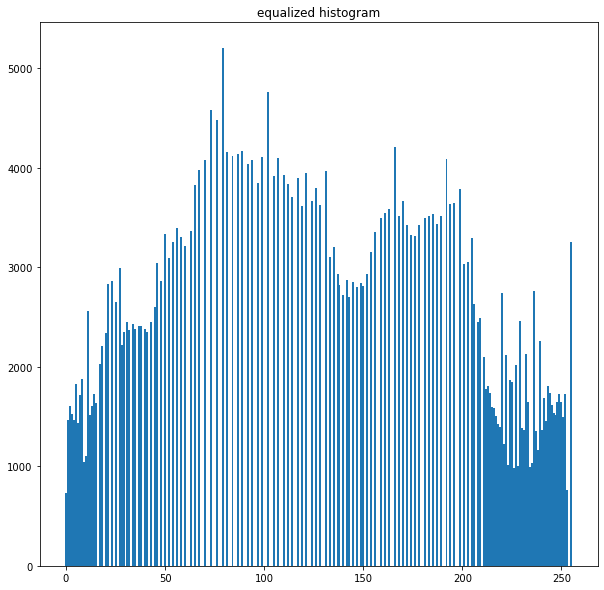

In [13]:
bin_count,bins_edges = np.histogram(I_eq,num_bins,bins_edges_min_max)
bins_start = bins_edges[:-1]

draw_hist(bins_start,bin_count)
plt.title("equalized histogram")


Text(0.5, 1.0, 'equalized PDF and const*CDF')

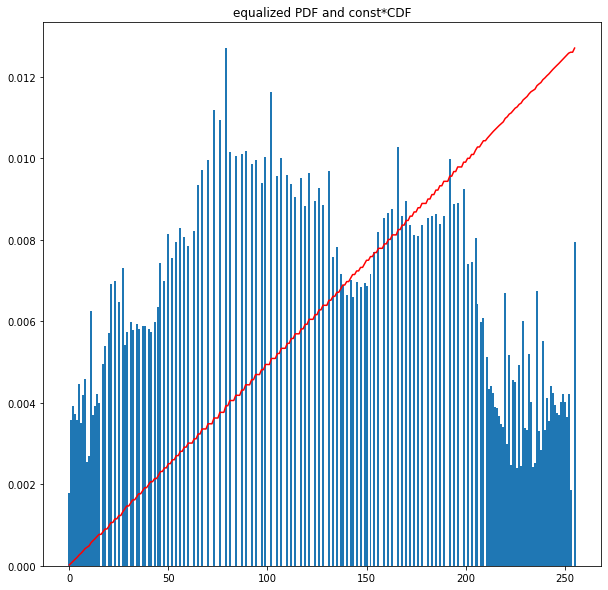

In [14]:
pdf = bin_count/np.sum(bin_count)
cdf = np.cumsum(pdf)

fig,ax = draw_hist(bins_start,pdf)
ax.plot(cdf*np.max(pdf),'r')
plt.title("equalized PDF and const*CDF")


## cv2 histogram equalization function


Text(0.5, 1.0, 'cv2.equalizeHist() result')

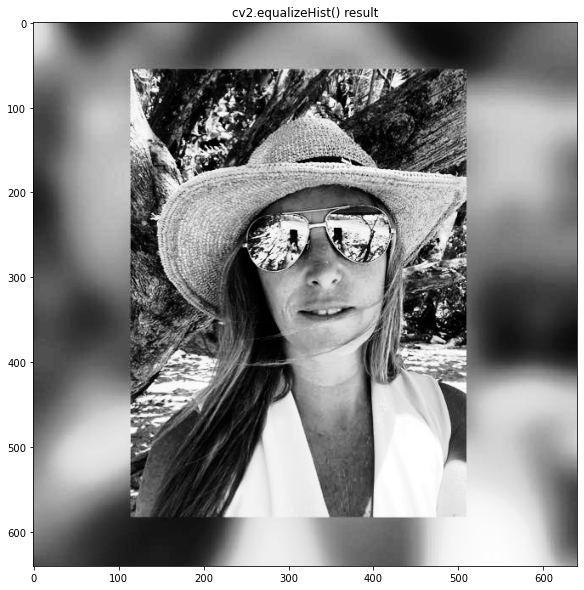

In [15]:
I_eq_cv2 = cv2.equalizeHist(I)

plt.figure(figsize=figsize)
plt.imshow(I_eq_cv2, cmap='gray', vmin=0, vmax=255)
plt.title("cv2.equalizeHist() result")

